<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-стопслов-из-NLTK" data-toc-modified-id="Загрузка-стопслов-из-NLTK-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка стопслов из NLTK</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Лемматизация</a></span><ul class="toc-item"><li><span><a href="#Разбиение-на-тренировочный-и-тестовый-наборы" data-toc-modified-id="Разбиение-на-тренировочный-и-тестовый-наборы-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Разбиение на тренировочный и тестовый наборы</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Baseline" data-toc-modified-id="Baseline-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Baseline</a></span></li><li><span><a href="#Вспомогательные-классы" data-toc-modified-id="Вспомогательные-классы-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Вспомогательные классы</a></span><ul class="toc-item"><li><span><a href="#Классы-для-преобразваний-результата-кроссвалидации-в-датафрейм" data-toc-modified-id="Классы-для-преобразваний-результата-кроссвалидации-в-датафрейм-2.0.2.1"><span class="toc-item-num">2.0.2.1&nbsp;&nbsp;</span>Классы для преобразваний результата кроссвалидации в датафрейм</a></span></li><li><span><a href="#Классы-для-презентации-графиков" data-toc-modified-id="Классы-для-презентации-графиков-2.0.2.2"><span class="toc-item-num">2.0.2.2&nbsp;&nbsp;</span>Классы для презентации графиков</a></span></li></ul></li><li><span><a href="#Подбор-параметров-словаря" data-toc-modified-id="Подбор-параметров-словаря-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Подбор параметров словаря</a></span></li><li><span><a href="#Подбор-параметров-модели" data-toc-modified-id="Подбор-параметров-модели-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Подбор параметров модели</a></span></li><li><span><a href="#Финальный-тест" data-toc-modified-id="Финальный-тест-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>Финальный тест</a></span></li><li><span><a href="#Вес-признаков" data-toc-modified-id="Вес-признаков-2.0.6"><span class="toc-item-num">2.0.6&nbsp;&nbsp;</span>Вес признаков</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
!pip install catboost

!pip install spacy
!spacy download en_core_web_sm

!pip install wordcloud 
!pip install Pillow

                                              0.0/12.8 MB ? eta -:--:--
                                              0.0/12.8 MB ? eta -:--:--
                                              0.0/12.8 MB ? eta -:--:--
                                              0.0/12.8 MB ? eta -:--:--
                                              0.0/12.8 MB ? eta -:--:--
                                             0.0/12.8 MB 130.4 kB/s eta 0:01:38
                                             0.1/12.8 MB 251.0 kB/s eta 0:00:51
                                             0.2/12.8 MB 581.0 kB/s eta 0:00:22
                                             0.3/12.8 MB 840.4 kB/s eta 0:00:15
     -                                        0.5/12.8 MB 1.2 MB/s eta 0:00:11
     --                                       0.8/12.8 MB 1.8 MB/s eta 0:00:07
     ----                                     1.3/12.8 MB 2.7 MB/s eta 0:00:05
     -----                                    1.8/12.8 MB 3.4 MB/s eta 0:00:04
    

In [2]:
import re
import numpy as np
import pandas as pd
import urllib.request

import functools as fnc
import operator as opr

import nltk
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import spacy

from  wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from catboost import CatBoostClassifier,Pool

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

import matplotlib.pyplot as plt

In [3]:
np.random.seed(499)
get_yandex = lambda fn: urllib.request.urlretrieve(f"https://code.s3.yandex.net/datasets/{fn}", f"datasets/{fn}" )

### Загрузка стопслов и лемм из NLTK

In [4]:
%%time
nltk.download('stopwords')
stopwords = list(set(nltk_stopwords.words('english')))
stopwords

nltk.download('wordnet')
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leonid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Leonid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


CPU times: total: 1 s
Wall time: 1.35 s


### Загрузка данных

In [5]:
try:
    get_yandex('toxic_comments.csv')
    df = pd.read_csv('datasets/toxic_comments.csv',index_col=0,encoding='utf-8')
except Exception as e:
    print(e)
    exit(1)
    
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


,text,toxic
63223,No. I don't think you mean to be obnoxious. I ...,0
132655,Wikipiere\nHi. I strongly suspect that [user] ...,0
4247,"""\n\n Unprotections \n\nI was wondering what y...",0
88887,Woo-hoo2 \n\nAnd now the Jonathan Wild is seri...,0
50835,Semi-protected edit request on 16 October 2014...,0
140099,And your point is...? It's just an image. Who ...,0
1223,"""== OldLady Productions ==\n\nHistory \n\nOldL...",0
71353,"""\n\nStop blocking me, I'm editing """"evolution...",0
131311,i want some damn answers now you imbeciles,1
122615,", this city has a population of 1.5 million!",0


### Предварительный анализ

In [6]:
df.isna().sum()

text     0
toxic    0
dtype: int64

In [7]:
df.text.duplicated().sum()

0

Пустых значений и дублированных текстов нет 

In [8]:
df.toxic.mean()

0.10161213369158527

Набор данных несбалансирован по целевому признаку, вероятно потребуется учитывать баланс.  
Если этого будет недостаточно, можно попробовать ограничить количество нетоксичных записей с помощью семплинга

### Лемматизация 

In [9]:
%%time
sentence1 = "The striped bats are hanging on their feet for best"
sentence2 = "you should be ashamed of yourself went worked"

def lemmatize(text):
    tokens  = nlp(text)
    return " ".join([token.lemma_ for token in tokens])
print( lemmatize(sentence1),lemmatize(sentence2) )

df['lemmas'] = df.text.apply(lemmatize)

x = df.sample(10).lemmas.apply(lambda st: print(f" {st:.99s}") )

the stripe bat be hang on their foot for good you should be ashamed of yourself go work
 , 20 November 2011 ( UTC ) 

 oh no THEY'LL BLOCK ME ! ! ! ! that be the bad punishment ever ! ! ! 
 " 

 Image Tagging Image : nmey.jpg 

  this medium may be delete . 

 thank for upload image : nme
 stop warn I 
 you can not vandalize the sandbox noobarino
 " 
 much well ] and yeah , it be the well free image I could find p –   ( talk ) "
 I have be on wiki for a while so I know what sockpuppet be , I do not as to whom you point at when 
 hi Small Text 
  Headline text m
 " 

  confused about iban  

 you institute   an iban on WarKosign an myself . WarKosign revert my 
 " = = = = Gordon Neilson==== 
  → Walter Gordon Neilson ( link to redirect • [ history ] • )  

 de
 file : MAHFUD ALI BEIBA3.jpg 
 Hi , I have upload the file to illustrate the Mahfud Ali Beiba artic
 " 
  oh no , just wait - LevenBoy will be the one generate heat and light like you can not imagine 
CPU times: total: 22min 42s


#### Облака слов   
Посмотрим наиболее частые слова для нормальных и токсичных текстов

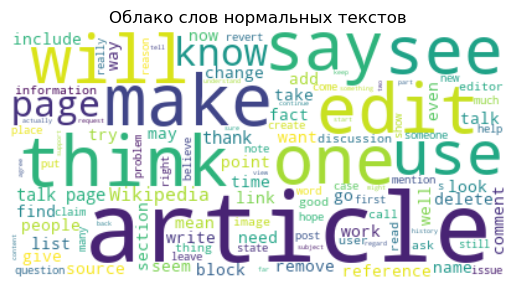

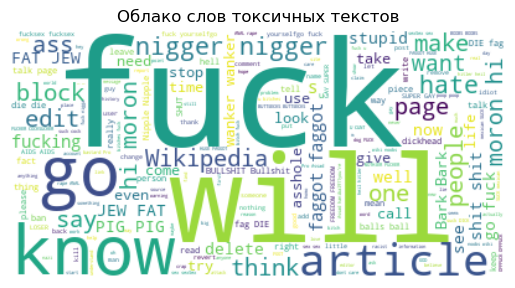

CPU times: total: 39.3 s
Wall time: 39.7 s


In [10]:
%%time

def show_wordcloud(serie,repeat=False,title = 'Frequency of words'):
    wcl = WordCloud(background_color="white")
    wcl.generate(' '.join(serie.values))
    plt.axis("off")
    plt.title(title)
    plt.imshow(wcl, interpolation="bilinear")
    plt.show()

    
show_wordcloud(df.lemmas[df.toxic==0],title='Облако слов нормальных текстов')  
show_wordcloud(df.lemmas[df.toxic==1],title='Облако слов токсичных текстов')  



#### Дополнительные признаки

##### Количество слов

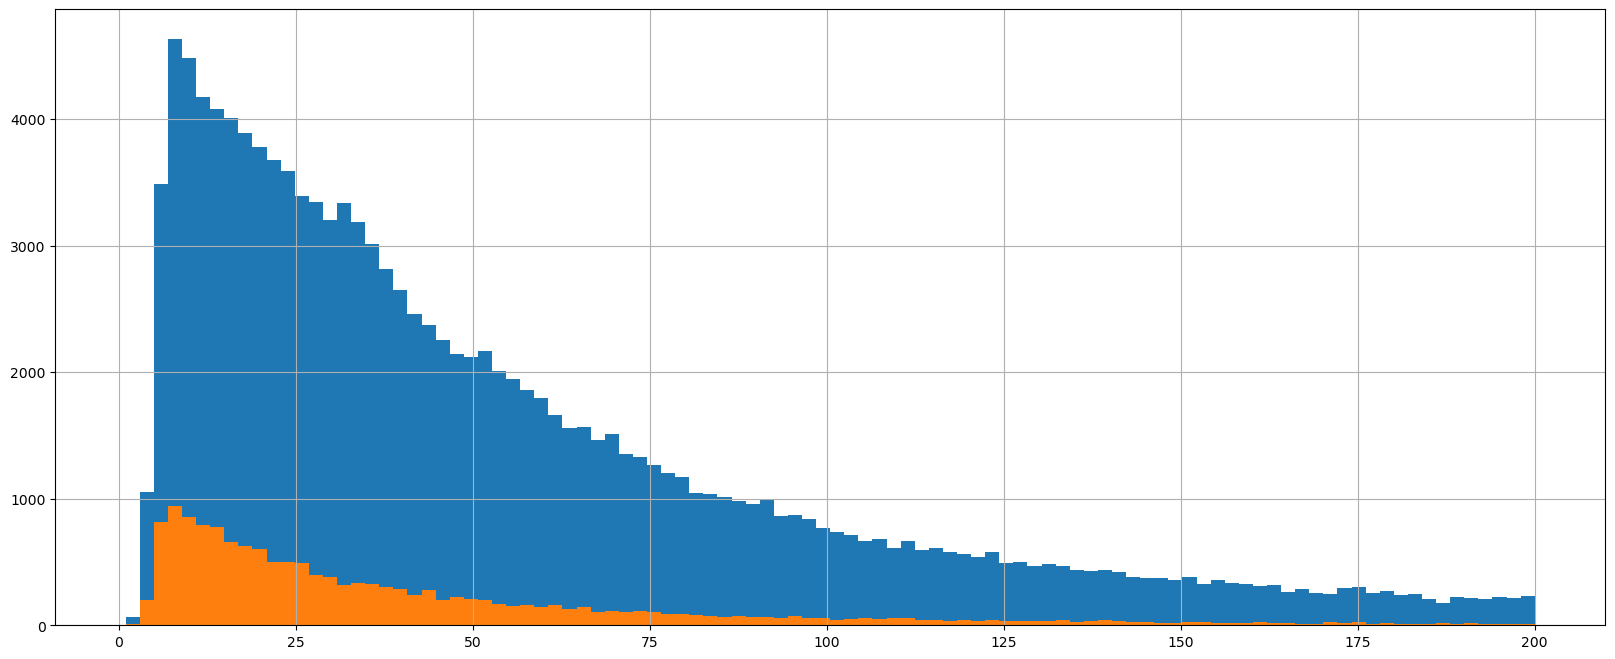

In [11]:
df['num_words'] = df.lemmas.apply(lambda s: len(s.split()) )
df[df.toxic==0].num_words.hist(bins=100 ,figsize =(20,8),range=(1,200));
df[df.toxic==1].num_words.hist(bins=100 ,figsize =(20,8),range=(1,200));


Разнца в среднем количестве слов небольшая  у токсичных не токсичных текстов,  
гистограммы похожи, поэтому я особо много не жду от добавления признака

In [12]:
df.lemmas[df.num_words > 512]

10        " \n Fair use rationale for image : Wonju.jpg ...
50        " \n\n BI , you say you want to talk \n\n at t...
81        " \n\n be it scientific to attribute an event ...
126       Ahh , Hello Witzeman \n\n 203.92.84.161  \n sy...
160       " = = attribute and classifying of personality...
                                ...                        
159091    " \n\n I blieve the translation from the press...
159275    " \n\n  feedback as request \n\n hey Antonin !...
159297    " \n\n  News suppress on Wikipedia http://rexc...
159339    " \n\n  Evidence Redux \n\n I will be frank . ...
159363    I have just follow from your edit exchange on ...
Name: lemmas, Length: 2686, dtype: object

Есть довольно много выбросов по этому признаку, но судя по примеру ниже, это нормальные статьи, просто с необычными вставками, и их можно оставить  

In [13]:
print( df.loc[126,'lemmas'] )

Ahh , Hello Witzeman 

 203.92.84.161  
 symbol : ~ | ¡ ¿ † ‡ ↔ ↑ ↓ • ¶    # ½ ⅓ ⅔ ¼ ¾ ⅛ ⅜ ⅝ ⅞ ∞    ' " ' " « »    ¤ ₳ ฿ ₵ ¢ ₡ ₢ $ ₫ ₯ € ₠ ₣ ƒ ₴ ₭ ₤ ℳ ₥ ₦ № ₧ ₰ £ ៛ ₨ ₪ ৳ ₮ ₩ ¥    ♠ ♣ ♥ ♦    m² m³ 
 character : Á á Ć ć É é Í í Ĺ ĺ Ń ń Ó ó Ŕ ŕ Ś ś Ú ú Ý ý ź ź    à à è è Ì ì Ò ò Ù ù    Â â ĉ ĉ ê ê Ĝ ĝ Ĥ ĥ Î î Ĵ ĵ Ô ô Ŝ ŝ û û ŵ ŵ ŷ ŷ    ä ä ë ë Ï ï Ö ö Ü ü ÿ ÿ    ß    ã ã Ẽ ẽ Ĩ ĩ Ñ ñ õ õ Ũ ũ Ỹ ỹ    ç ç Ģ ģ Ķ ķ Ļ ļ Ņ ņ Ŗ ŗ Ş ş Ţ ţ    Đ đ    Ů ů    Ǎ ǎ Č č Ď ď Ě ě Ǐ ǐ Ľ ľ Ň ň Ǒ ǒ Ř ř Š š Ť ť Ǔ ǔ ž ž    ā ā Ē ē Ī ī Ō ō ū ū Ȳ ȳ Ǣ ǣ    ǖ ǘ ǚ ǜ Ă ă Ĕ ĕ Ğ ğ Ĭ ĭ ŏ ŏ Ŭ ŭ    ċ ċ Ė ė ġ ġ i̇ ı Ż ż    ą ą ę ę į į ǫ ǫ Ų ų    Ḍ ḍ ḥ ḥ Ḷ ḷ Ḹ ḹ Ṃ ṃ Ṇ ṇ Ṛ ṛ Ṝ ṝ Ṣ ṣ Ṭ ṭ    Ł ł    ő ő Ű ű    Ŀ ŀ    ħ ħ    Ð ð þ þ    Œ œ    Æ æ Ø ø Å å    Ə ə    
 Greek : Ά ά Έ έ Ή ή Ί ί Ό ό Ύ ύ Ώ ώ    α α β β γ γ Δ δ    Ε ε ζ ζ Η η Θ θ    ι ι κ κ λ λ μ μ    Ν ν Ξ ξ Ο ο Π π    Ρ ρ Σ σ ς Τ τ Υ υ    φ φ Χ χ Ψ ψ Ω ω    
 Cyrillic : А а Б б В в Г г    Ґ ґ Ѓ ѓ Д д Ђ ђ    Е е Ё ё є є Ж ж    з з ѕ ѕ и и І і    Ї ї й й ј ј К к    Ќ ќ 

##### Средняя длина слова

In [14]:
df['avg_word_len'] = df.apply(lambda r: len(r['lemmas'])/r['num_words'] ,axis=1)
df[df.toxic==0].avg_word_len.mean(),df[df.toxic==1].avg_word_len.mean(),

(4.9363351127820305, 5.160548828889332)

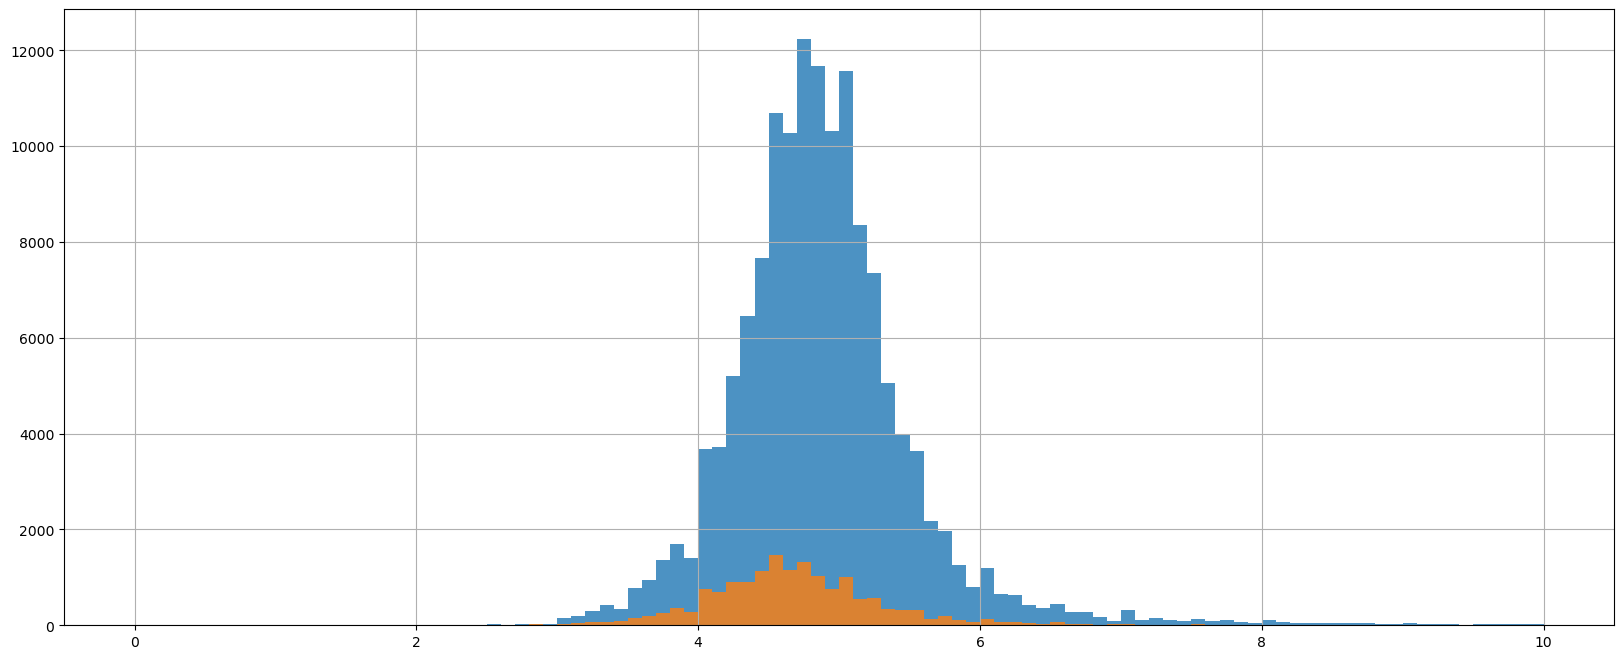

In [15]:
df[df.toxic==0].avg_word_len.hist(bins=100 ,figsize =(20,8),range=(0,10),alpha=0.8);
df[df.toxic==1].avg_word_len.hist(bins=100 ,figsize =(20,8),range=(0,10),alpha=0.8);

Также близкие средние и похожие гистограммы 

#### Разбиение на тренировочный и тестовый наборы

In [16]:
%%time
T = 'lemmas'  
X = ['lemmas','num_words','avg_word_len']
y = 'toxic'
tr,te = train_test_split(df, test_size = .25, shuffle = True, stratify=df[y])

CPU times: total: 93.8 ms
Wall time: 84.6 ms


## Обучение

#### Baseline

CatBoost может работать с текстом напрямую и имеет смыл проверить в первую очередь его   

In [17]:
text_options =  {
    "tokenizers" : [{
        "tokenizer_id" : "Space",
        "delimiter" : " ,",
        "lowercasing" : "true",
#        "lemmatizing" : "true",
        "split_by_set": "true"                    
    },{
    'tokenizer_id': 'Sense',
    'separator_type': 'BySense'
    }],

    "dictionaries" : [
        {"dictionary_id" : "BiGram",
            "max_dictionary_size" : "100000",
            "occurrence_lower_bound" : "15",
            "gram_order" : "2"
        },{
        "dictionary_id" : "Word",
        "occurrence_lower_bound" : "20",
        "gram_order" : "1"
        },
        {"dictionary_id" : "TetraGram",
            "max_dictionary_size" : "100000",
            "occurrence_lower_bound" : "10",
            "gram_order" : "4"
        }
    ],
    "feature_processing" : {
        "default" : [{
            "dictionaries_names" : ["Word","BiGram",'TetraGram'],
            "feature_calcers" : ["BoW"],
            "tokenizers_names" : ["Sense"]
        }]
        
    }
}
cbm = CatBoostClassifier(learning_rate = .1,n_estimators = 2048 ,
                         bootstrap_type='Bernoulli',subsample=.2,
                         text_processing = text_options,
                         verbose= 128, eval_metric='F1')

In [18]:
train,val = train_test_split( tr,test_size=.25,stratify=tr[y]) 

In [19]:
p_train = Pool(train[X],train[y], text_features = [T] ) 
p_val = Pool( val[X], text_features = [T] )
cbm.fit(p_train) 
pr = cbm.predict(p_val)
for metric in [f1_score,accuracy_score,precision_score,recall_score]:
    print( f"{metric.__name__}:{round( metric(val[y],pr), 4)}\t" )
confusion_matrix(val[y],pr)


0:	learn: 0.2782609	total: 340ms	remaining: 11m 35s
128:	learn: 0.6490517	total: 20.9s	remaining: 5m 10s
256:	learn: 0.7011842	total: 41.2s	remaining: 4m 47s
384:	learn: 0.7229857	total: 1m 1s	remaining: 4m 25s
512:	learn: 0.7355388	total: 1m 22s	remaining: 4m 5s
640:	learn: 0.7499670	total: 1m 42s	remaining: 3m 45s
768:	learn: 0.7592945	total: 2m 3s	remaining: 3m 24s
896:	learn: 0.7697912	total: 2m 23s	remaining: 3m 3s
1024:	learn: 0.7763243	total: 2m 44s	remaining: 2m 43s
1152:	learn: 0.7851585	total: 3m 4s	remaining: 2m 23s
1280:	learn: 0.7907572	total: 3m 24s	remaining: 2m 2s
1408:	learn: 0.7964263	total: 3m 45s	remaining: 1m 42s
1536:	learn: 0.8029976	total: 4m 6s	remaining: 1m 21s
1664:	learn: 0.8097258	total: 4m 27s	remaining: 1m 1s
1792:	learn: 0.8139682	total: 4m 48s	remaining: 41s
1920:	learn: 0.8201584	total: 5m 9s	remaining: 20.4s
2047:	learn: 0.8255181	total: 5m 29s	remaining: 0us
f1_score:0.7224	
accuracy_score:0.9522	
precision_score:0.881	
recall_score:0.6122	


array([[26582,   251],
       [ 1177,  1858]], dtype=int64)

Результат близок к требуемому  и возможно , что с помощью подбора гиперпараметров можно добиться F1_score > 0.75   
Но так как это слишком просто и непонятно, что он делает внутри , я решил для основательного анализа с кроссвалидацией самостоятельно создать мешок слов.

#### Вспомогательные классы

Для анализа и представления  результатов кроссвалидации я использую небольшую библиотеку классов из предыдущих работ 

##### Классы для преобразваний результата кроссвалидации в датафрейм

##### Классы для презентации графиков

In [20]:
class ParsedResult:
    def __init__(self,result,force_string_cols=[],metric_name='score'):
        self.df = pd.DataFrame.from_dict( 
            { k:v for k,v in result.items() if k not in ['params']}
        )
# drop param_ prefix from column names for tidy display         
        self.primary_score='mean_test_'+metric_name
        param_names = [ c for c in self.df.columns if c[:6]=='param_' ]        
        self.param_cols = [ c[6:] for c in param_names ]              
        self.df = self.df.rename( columns={ p:c for p,c in zip(param_names,self.param_cols) } )
# also drop model_ prefix which we use for model grid in pipeline   
        model_names = [ c for c in self.df.columns if c[:7]=='model__' ]
        self.param_cols = [c[7:]  if c[:7]=='model__' else c for c in self.param_cols ]
        self.model_cols = [ c[7:] for c in model_names ]   
        self.df = self.df.rename( columns={ p:c for p,c in zip(model_names,self.model_cols) } )
# select parameters, for which tested several values and arrange them descending (by number of differnt values)
        values_per_cols = list(zip( self.param_cols,[ len( np.unique( self.df[c].values ) ) for c in self.param_cols]))
        self.multi_value_cols =[it[0] for it in sorted(values_per_cols, key=lambda pair:pair[1],reverse=True) if it[1]>1 ]
# some object columns may be not string (f.e. lists)
        for i in range(len(self.df.columns)):
            if self.df.dtypes[i]=='object':
                self.df[self.df.columns[i]] = self.df[self.df.columns[i]].astype(str)
        
            
    def select(self, index,values=[],filters={},agg=[] ):
        values = [ [self.primary_score] ,values][bool(values)]
        if len(filters)>0 :
            condition = 'and'.join([ f" {k}=={v} " for k,v in filters.items() ]) 
            filtered = self.df.query(condition)    
        else:
            filtered = self.df
        cols = [ c for c in self.multi_value_cols if c not in list(filters.keys())+[index]+values ]      
        return(self.df.pivot_table(index=index,values=values,columns=cols)  )

In [21]:
class Styler:
    base_array=[]
    def __init__(self,param_array=[]):
        self.params = [ self.base_array,param_array][bool(param_array)]
    
    def key(self):
        pass
    
    def put(self,dct,index):
        dct[self.key()] = self.params[index]
        
class ColorStyler(Styler):
    base_array=[*'rgbykm']
    def key(self):
        return('color')

class DashStyler(Styler):
    base_array=['--',':','-.','-']
    def key(self):
        return('ls')
    
class WidthStyler(Styler):
    base_array=[ 2,4,7]
    def key(self):
        return('lw')

class AlphasStyler(Styler):
    base_array=[ .3,.9]
    def key(self):
        return('alpha')


In [22]:
class ResultPlotter:
    base_params = {
        'colors':[*'rgbykm'],
        'styles':['--',':','-.','-'],
        'widths':[ 2,4,7],
        'alphas':[.3,.8],
        'figsize': (20,8),
        'logscale':""
    }
    

    def __init__(self,sel, params = {} ):

        self.df= sel
    
        self.params=self.base_params | params
        self.stylers = [ColorStyler(self.params['colors']),DashStyler(self.params['styles']),
                        WidthStyler(self.params['widths']),AlphasStyler(self.params['alphas'])]
        self.mcols = self.df.columns
        self.lev_names = self.mcols.names[1:]
        self.num_levels= len(self.lev_names)
        self.level_sizes=[ len(set(self.mcols.get_level_values(x))) for x in self.lev_names]

# auxliary func to forms sequence of indexes for levels
# result is need index on the level  which may be one of color|dashstyle|linewidth
    def idx_on_level(self,idx, lev_num):
        items_on_hyperplane = multiply(self.level_sizes[(lev_num+1):]) 
        return idx//items_on_hyperplane% self.level_sizes[lev_num]
    
    def plot(self):
        fig,ax = plt.subplots(figsize=(20,6))
        if 'x' in self.params['logscale'].lower():
            ax.set_xscale('log')
        
        for i in range(len( self.mcols)):
            graph_params = {}
            for i_level in range(self.num_levels):
                self.stylers[i_level].put( graph_params, self.idx_on_level(i,i_level) ) 
            idx=self.mcols[i]
            
            graph_params['label'] = ','.join( [ f"{n}:{i} " for n,i in zip(self.lev_names,idx[1:]) ] )
            ax.plot(self.df[idx] ,**graph_params)
#            ax.set_title(f'Тест {type(self.model).__name__}')
            ax.set_xlabel('learning rate')
            ax.set_ylabel('log_loss metric')
            ax.legend()

#### Подбор параметров словаря

 В принципе, для пользовния языком достаточно 4-5К слов , больший активный словарь уже признак хорошего литературного языка и такой объем вряд ли используется в коротких текстах.    
 Понятно, что чем больше словарь  -  тем точнее, но тест  ограничен ресурсами компьютера и временем, так что я хочу подобрать такой размер словаря , расширение которого  уже не дает существенного улучшения результата.   
 Я предполагаю, что потеря метрики от словаря мало зависит от модели , поэтому для скорости использую LogisticRegression.   
 Здесь же проверяется эффект от добавления в словарь n-грамм

In [23]:
%%time
ctf = ColumnTransformer( 
        [('vect', TfidfVectorizer(stop_words = stopwords), T )], 
                    remainder=StandardScaler(),
                    verbose_feature_names_out = False
    )
pipe = Pipeline(steps = [
    ['tf', ctf ],
    ['model', LogisticRegression(max_iter= 2000)]
])
params_grid = {
    'model__solver': ['lbfgs'],
    'tf__vect__max_features':[3_000,4_000,5000,6_000,7_000,8_000,9_000],
    'tf__vect__ngram_range':[(1,1),(1,2),(1,3),(1,4)]

}
gs=GridSearchCV(pipe, params_grid,
                cv=4 ,
                scoring = 'f1')
gs.fit(tr[X],tr[y])
gs.cv_results_

CPU times: total: 1h 3min 48s
Wall time: 56min 36s


{'mean_fit_time': array([ 7.60091305, 18.23126024, 31.41131347, 46.42991412,  7.77907264,
        18.43672436, 31.94786787, 47.61643744,  8.66620934, 18.46448112,
        31.875965  , 47.00172496,  7.90734804, 18.24308366, 32.07079971,
        46.0545792 ,  8.14273429, 18.69383359, 32.01972926, 46.56335497,
         8.97648478, 21.21411705, 32.72417247, 47.81899464,  8.23824054,
        19.07054818, 32.1836921 , 49.7513606 ]),
 'std_fit_time': array([0.21532911, 0.93356449, 0.12682043, 1.08942459, 0.22211803,
        1.19726026, 0.3518138 , 1.6545131 , 0.27883117, 0.51492563,
        0.11800798, 0.94215762, 0.04675659, 0.11226683, 0.31251802,
        0.19586845, 0.2464418 , 0.95130283, 0.29801277, 0.71977021,
        1.32092577, 2.23986247, 0.44197446, 1.00330421, 0.17732427,
        0.92551347, 0.35760942, 1.83046023]),
 'mean_score_time': array([1.77716851, 2.76451057, 3.69063169, 4.57418489, 1.77992886,
        2.79896384, 3.71928179, 5.08821064, 2.09064209, 2.86271393,
        3.74

In [24]:
multiply = lambda array: fnc.reduce( opr.mul,array,1 )
p = ParsedResult(gs.cv_results_)
sel = p.select('tf__vect__max_features')
sel

mean_test_score                              
tf__vect__ngram_range           (1, 1)    (1, 2)    (1, 3)    (1, 4)
tf__vect__max_features                                              
3000                          0.729039  0.720133  0.715189  0.715794
4000                          0.734498  0.726805  0.724851  0.722278
5000                          0.733887  0.729634  0.728747  0.726993
6000                          0.733985  0.731007  0.729697  0.729812
7000                          0.732472  0.730209  0.730010  0.729804
8000                          0.730609  0.729348  0.730131  0.730530
9000                          0.729971  0.728056  0.729347  0.730077

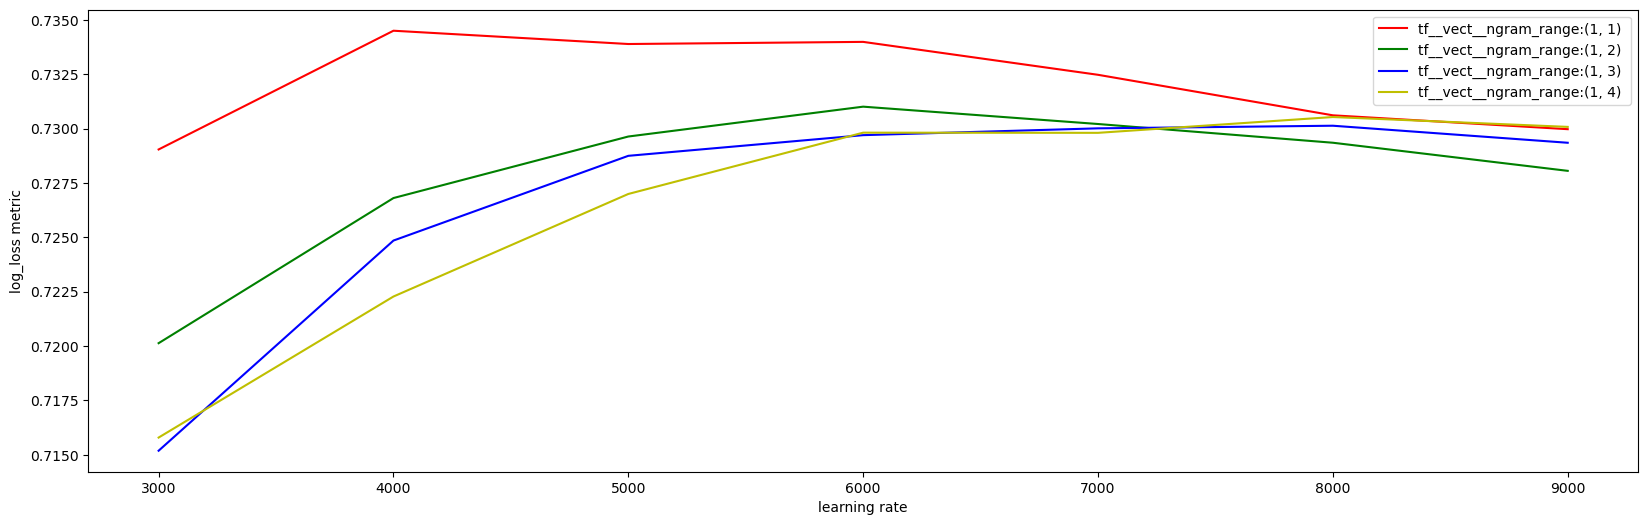

In [25]:
ResultPlotter(sel).plot()

Расширение словаря за 4000 слов не дает существенного прироста метрики,
Несколько неожиданно , что учёт сочетаний слов ухудшает метрику, и чем длиннее сочетания, тем хуже.
Дальше вся работа идет со словарем 4_000 слов и  n-граммами (1,1)

In [26]:
max_features = 4_000
ngram_range = (1,1)

#### Подбор параметров модели 

Обсчет модели занимает довольно много времени, слеудющий блок выполняется почти 3 часа.  
Для ускорения расчет производится на субсэмплах.
Подбирается оптимальная скорость обучения и способ балансировки для 1024 оценщиков.  

In [27]:
%%time
vect = TfidfVectorizer(stop_words = stopwords, max_features=max_features, ngram_range=ngram_range)
ctf = ColumnTransformer( 
        [('vect', vect, T )], 
                    remainder=StandardScaler(),
                    verbose_feature_names_out = False
    )
cb = CatBoostClassifier(n_estimators = 1024,
                   random_state=4999,
                   eval_metric='F1',verbose =128)
pipe = Pipeline( [['tf',ctf], ['model',cb] ] )
params_grid = {    
    'model__learning_rate':[.05,.1,.2,.5],
    'model__auto_class_weights':['None','Balanced','SqrtBalanced']
}
gs=GridSearchCV(pipe, params_grid,
                cv=3 ,
                scoring = 'f1')
gs.fit(tr[X],tr[y])
gs.cv_results_

0:	learn: 0.4750852	total: 604ms	remaining: 10m 17s
128:	learn: 0.6293625	total: 1m 20s	remaining: 9m 17s
256:	learn: 0.6888574	total: 2m 28s	remaining: 7m 23s
384:	learn: 0.7218826	total: 3m 34s	remaining: 5m 56s
512:	learn: 0.7429903	total: 4m 40s	remaining: 4m 39s
640:	learn: 0.7585594	total: 5m 46s	remaining: 3m 26s
768:	learn: 0.7714181	total: 6m 52s	remaining: 2m 16s
896:	learn: 0.7801790	total: 7m 58s	remaining: 1m 7s
1023:	learn: 0.7861439	total: 9m 3s	remaining: 0us
0:	learn: 0.4259491	total: 543ms	remaining: 9m 15s
128:	learn: 0.6271794	total: 1m 8s	remaining: 7m 55s
256:	learn: 0.6902571	total: 2m 14s	remaining: 6m 40s
384:	learn: 0.7270791	total: 3m 19s	remaining: 5m 31s
512:	learn: 0.7493286	total: 4m 24s	remaining: 4m 23s
640:	learn: 0.7627543	total: 5m 32s	remaining: 3m 18s
768:	learn: 0.7750547	total: 6m 37s	remaining: 2m 11s
896:	learn: 0.7850779	total: 7m 43s	remaining: 1m 5s
1023:	learn: 0.7918138	total: 8m 48s	remaining: 0us
0:	learn: 0.4277190	total: 540ms	remainin

128:	learn: 0.8642039	total: 1m 9s	remaining: 8m 3s
256:	learn: 0.8960011	total: 2m 17s	remaining: 6m 51s
384:	learn: 0.9160081	total: 3m 29s	remaining: 5m 47s
512:	learn: 0.9307159	total: 5m 3s	remaining: 5m 1s
640:	learn: 0.9443031	total: 6m 16s	remaining: 3m 44s
768:	learn: 0.9570312	total: 7m 36s	remaining: 2m 31s
896:	learn: 0.9660854	total: 8m 52s	remaining: 1m 15s
1023:	learn: 0.9732064	total: 10m 6s	remaining: 0us
0:	learn: 0.4264119	total: 602ms	remaining: 10m 15s
128:	learn: 0.8972895	total: 1m 21s	remaining: 9m 22s
256:	learn: 0.9308055	total: 2m 27s	remaining: 7m 19s
384:	learn: 0.9544686	total: 3m 33s	remaining: 5m 54s
512:	learn: 0.9710851	total: 4m 39s	remaining: 4m 38s
640:	learn: 0.9796291	total: 5m 45s	remaining: 3m 26s
768:	learn: 0.9832394	total: 6m 51s	remaining: 2m 16s
896:	learn: 0.9850855	total: 7m 56s	remaining: 1m 7s
1023:	learn: 0.9868795	total: 9m 1s	remaining: 0us
0:	learn: 0.4796029	total: 577ms	remaining: 9m 49s
128:	learn: 0.8985000	total: 1m 6s	remainin

256:	learn: 0.9161631	total: 2m 15s	remaining: 6m 44s
384:	learn: 0.9505145	total: 3m 23s	remaining: 5m 37s
512:	learn: 0.9732264	total: 4m 30s	remaining: 4m 28s
640:	learn: 0.9846146	total: 5m 36s	remaining: 3m 21s
768:	learn: 0.9892639	total: 6m 43s	remaining: 2m 13s
896:	learn: 0.9923911	total: 7m 49s	remaining: 1m 6s
1023:	learn: 0.9947451	total: 8m 55s	remaining: 0us
0:	learn: 0.5423206	total: 570ms	remaining: 9m 43s
128:	learn: 0.8715692	total: 1m 9s	remaining: 8m 2s
256:	learn: 0.9157500	total: 2m 19s	remaining: 6m 55s
384:	learn: 0.9494460	total: 3m 27s	remaining: 5m 44s
512:	learn: 0.9742849	total: 4m 36s	remaining: 4m 35s
640:	learn: 0.9855540	total: 5m 46s	remaining: 3m 26s
768:	learn: 0.9898986	total: 6m 53s	remaining: 2m 17s
896:	learn: 0.9930285	total: 8m 1s	remaining: 1m 8s
1023:	learn: 0.9950550	total: 9m 8s	remaining: 0us
0:	learn: 0.5052406	total: 728ms	remaining: 12m 24s
128:	learn: 0.7745108	total: 1m 32s	remaining: 10m 40s
256:	learn: 0.8194979	total: 2m 57s	remain

{'mean_fit_time': array([538.71900948, 548.80950077, 567.89169614, 530.12965004,
        535.32953103, 563.26816901, 569.46479543, 636.12233392,
        682.19251617, 591.13971353, 613.2009151 , 551.51367466]),
 'std_fit_time': array([ 7.79658776, 23.58161288, 21.70031655,  3.07373683,  1.26084009,
        35.14828813, 31.25940019, 16.66313029, 18.2862506 , 41.69929728,
        31.53549422,  6.86626313]),
 'mean_score_time': array([2.60589353, 2.76933575, 2.73192286, 2.77422452, 2.71395946,
        2.80625765, 3.20236651, 3.27350879, 2.93755341, 3.20241054,
        3.15436673, 2.96326454]),
 'std_score_time': array([0.0264214 , 0.14604969, 0.02165823, 0.01742441, 0.0297287 ,
        0.11844603, 0.38877836, 0.05971073, 0.11753285, 0.3098361 ,
        0.36942473, 0.07812139]),
 'param_model__auto_class_weights': masked_array(data=['None', 'None', 'None', 'None', 'Balanced', 'Balanced',
                    'Balanced', 'Balanced', 'SqrtBalanced', 'SqrtBalanced',
                    'SqrtBa

In [28]:
multiply = lambda array: fnc.reduce( opr.mul,array,1 )
p = ParsedResult(gs.cv_results_)
sel = p.select('learning_rate')
sel

mean_test_score                       
auto_class_weights        Balanced      None SqrtBalanced
learning_rate                                            
0.05                      0.732913  0.742640     0.769886
0.1                       0.742100  0.750893     0.773628
0.2                       0.751863  0.755386     0.769738
0.5                       0.746772  0.749944     0.758329

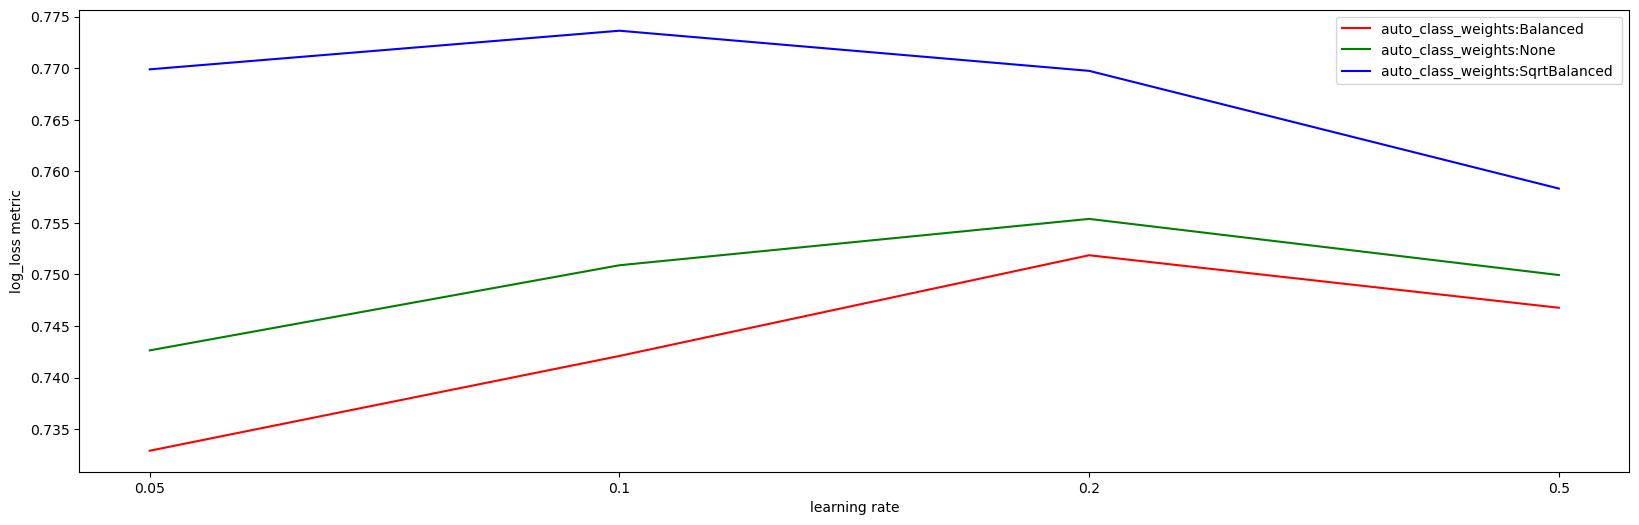

In [29]:
ResultPlotter(sel).plot()

Для финального теста выбран лучший результат - баланс SqrtBalance, скорость обучения .1,   
  она попадет в целевую зону по результатам кроссвалидации.    
Возможно модель без баланса недостаточно обучена  и из неё можно выжать больше, но проверка обучения займёт слишком много времени 

#### Финальный тест

In [30]:
pipe.set_params(**gs.best_params_)

pipe.fit(tr[X],tr[y])

pr = pipe.predict(te[X])
for metric in [f1_score,accuracy_score,precision_score,recall_score]:
    print( f"{metric.__name__}:{round( metric(te[y],pr), 4)}\t" )
confusion_matrix(te[y],pr)

0:	learn: 0.5052406	total: 731ms	remaining: 12m 27s
128:	learn: 0.7745108	total: 1m 40s	remaining: 11m 37s
256:	learn: 0.8194979	total: 3m 11s	remaining: 9m 30s
384:	learn: 0.8371749	total: 4m 36s	remaining: 7m 38s
512:	learn: 0.8508504	total: 6m 1s	remaining: 6m
640:	learn: 0.8627089	total: 7m 26s	remaining: 4m 26s
768:	learn: 0.8698879	total: 8m 52s	remaining: 2m 56s
896:	learn: 0.8788820	total: 10m 16s	remaining: 1m 27s
1023:	learn: 0.8856530	total: 11m 41s	remaining: 0us
f1_score:0.7835	
accuracy_score:0.9577	
precision_score:0.8172	
recall_score:0.7524	


array([[35095,   681],
       [ 1002,  3045]], dtype=int64)

При финальном тесте достигнуто значительное улучшение метрики - <s>0.778</s> <b>0.784</b>   
Причиной улучшение я считаю использованипе полного набора данных при финальном тестировании<br>

#### Вес признаков

Определим чувствительность к словам по результатам финального теста 

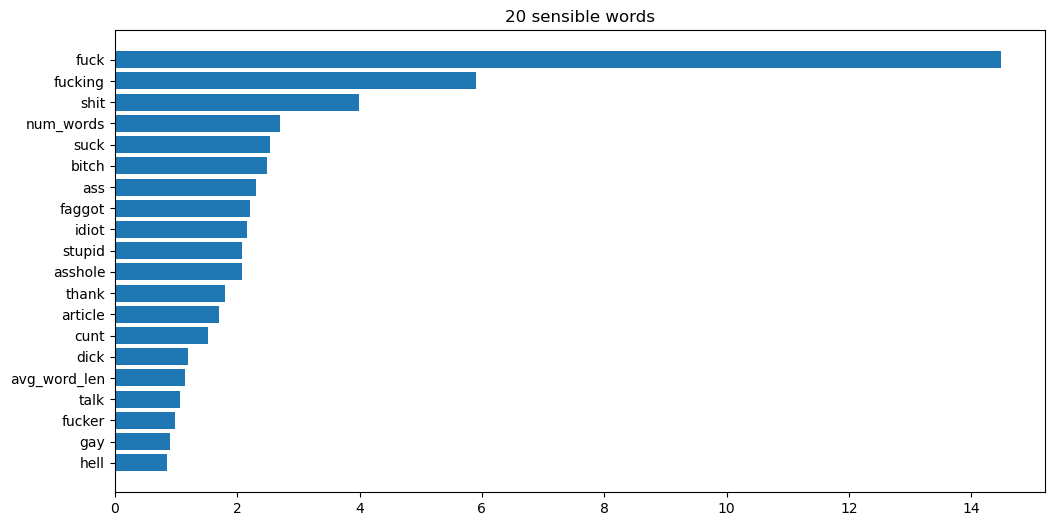

In [31]:
def catboost_explanation(model,transformer,num_of=20):
    feature_importance = model.feature_importances_
    sorted_idx =  np.argsort(feature_importance)[-num_of:]
    feature_names = transformer.get_feature_names_out()
    features = []
    importance = []
    for i in range(num_of):
        features.append( feature_names[sorted_idx[i]])
        importance.append(feature_importance[sorted_idx[i]])
    return features,importance

def plot_features_importance(features,importance,title = 'Feature Importance'):
#    features,importance = catboost_explanation(pipe['model'],pipe['tf'])
    fig = plt.figure(figsize=(12, 6))
    plt.barh(features,importance, align='center')
    plt.title(title)

plot_features_importance( *catboost_explanation(pipe['model'],pipe['tf']),title = '20 sensible words' )


В общем , соответствует ожиданиям и облаку слов, <s>хотя непонятно появление слов article и talk</s>   
Модель похоже рассматирвает слова <i>article</i> и <i>talk</i> как признак нетоксичности

## Выводы

* Комбинация векторизации TF-IDF и модели CatBoost может определять токсичность текста с метрикой F1 = .77
* Наилучший результат достигается при скоростях обучения ~0.2 ( c 1K оценщиков) и при слабом учете баланса
* При этом можно ограничиться словарём в 7тысяч слов
* Учет сочетаний слов непоказал преимуществ  по сравнению с учетом лишь одиночных слов
* Основным признаком токсичности для модели явлется использование матерных слов и прочих ругательств.